INTRODUCTION:
---
* This project combines association rule mining and classification to uncover patterns and predict
if the candidates are likely to further to higher studies or to start working based on the dataset.

### OBJECTIVE:
---
1. Association Rule Mining: Uncover interesting associations between user profiles,
experiences, and ratings.
2. Classification: Build a model to predict if the candidates are likely to further their study or to
start working.

### PYTHON TASK:
---
* Based on the stated dataset, devise a minimum of 4 exploratory questions to be answered by
the following tasks.
Association Rule Mining Task:
Devise a pipeline for preprocessing, mining, and knowledge evaluation, then implement the
python codes for the process. Steps should include, but not limited to the following:
1. Data Exploration (statistics and visualization)
2. Data Preprocessing (cleaning, transformation)
3. Data Mining (association rule mining) (e.g., Reading/Writing Skills, Memory Capability, Hard/Smart
Worker, Worked in Teams Ever, Leadership Experience, etc.)
4. Knowledge evaluation (interestingness measure)

### Classification Task:

* Implement at least 2 classification models based on the dataset to predict if the candidates are likely to further their study or to start working.

In [46]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

sns.set()
%matplotlib inline

In [39]:
df = pd.read_csv("career_dataset.csv")

1. Data Exploration (statistics and visualization)

In [12]:
df.head()

,Unnamed: 0,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,...,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Suggested Job Role
0,0,69,63,78,87,94,94,87,84,61,...,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,Database Developer
1,1,78,62,73,60,71,70,73,84,91,...,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,Database Administrator
2,2,71,86,91,87,61,81,72,72,94,...,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,Database Administrator
3,3,76,87,60,84,89,73,62,88,69,...,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,Database Developer
4,4,92,62,90,67,71,89,73,71,73,...,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,Systems Analyst


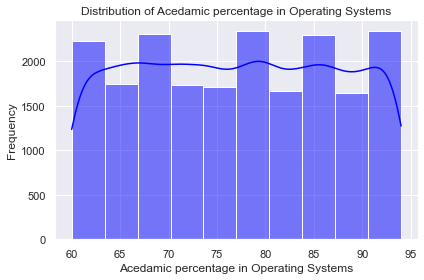

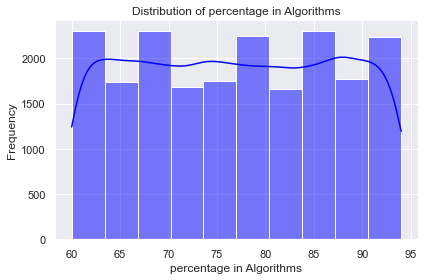

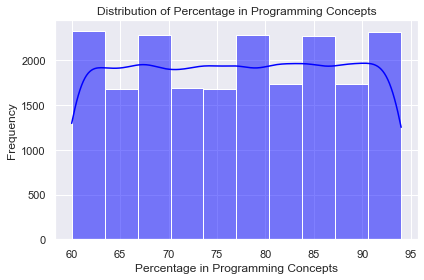

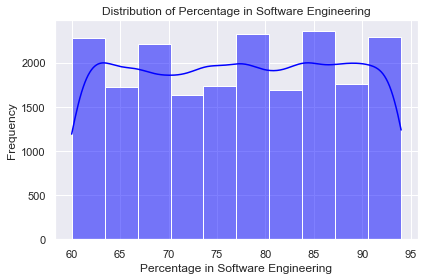

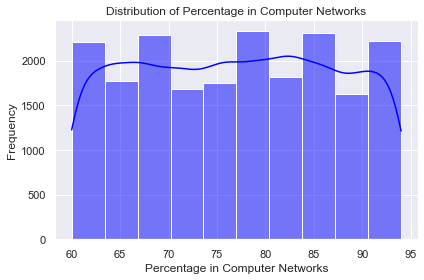

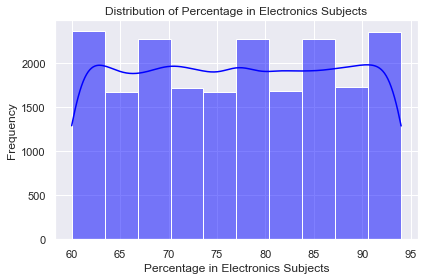

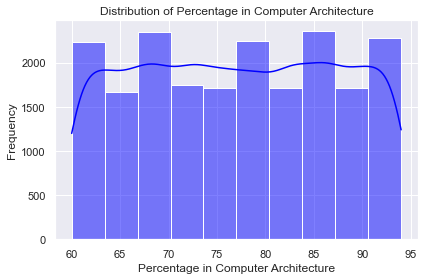

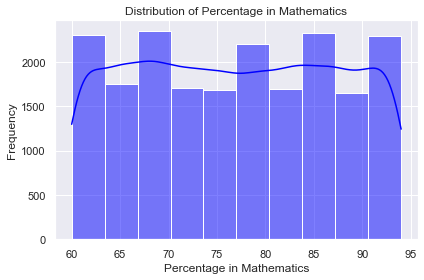

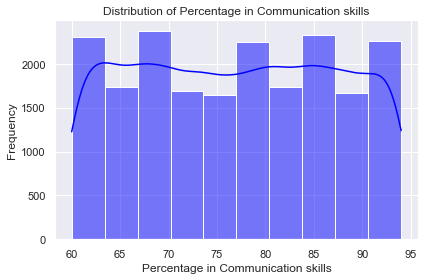

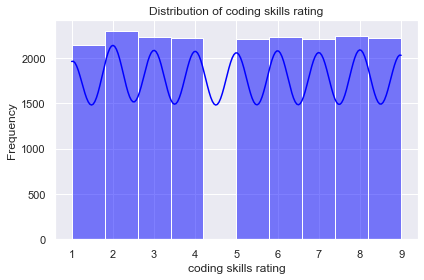

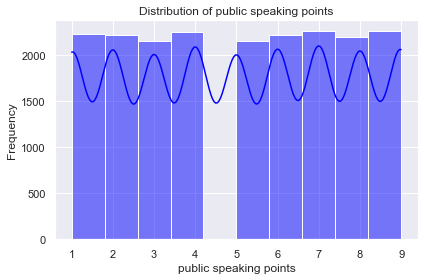

In [42]:
# Descriptive statistics for numerical columns
numerical_columns = [
    "Acedamic percentage in Operating Systems",
    "percentage in Algorithms",
    "Percentage in Programming Concepts",
    "Percentage in Software Engineering",
    "Percentage in Computer Networks",
    "Percentage in Electronics Subjects",
    "Percentage in Computer Architecture",
    "Percentage in Mathematics",
    "Percentage in Communication skills",
    "coding skills rating",
    "public speaking points"
]

# Generate a summary table
numerical_stats = career_data[numerical_columns].describe().transpose()

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(career_data[col], kde=True, bins=10, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [43]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

can work long time before system? :  ['yes', 'no']
self-learning capability? :  ['yes', 'no']
Extra-courses did :  ['yes', 'no']
certifications :  ['shell programming', 'machine learning', 'app development', 'python', 'r programming', 'information security', 'hadoop', 'distro making', 'full stack']
workshops :  ['cloud computing', 'database security', 'web technologies', 'data science', 'testing', 'hacking', 'game development', 'system designing']
talenttests taken? :  ['no', 'yes']
olympiads :  ['yes', 'no']
reading and writing skills :  ['excellent', 'poor', 'medium']
memory capability score :  ['excellent', 'medium', 'poor']
Interested subjects :  ['cloud computing', 'networks', 'hacking', 'Computer Architecture', 'programming', 'parallel computing', 'IOT', 'data engineering', 'Software Engineering', 'Management']
Introvert :  ['no', 'yes']
Job/Higher Studies? :  ['higherstudies', 'job']
Type of company want to settle in? :  ['Web Services', 'SAaS services', 'Sales and Marketing', '

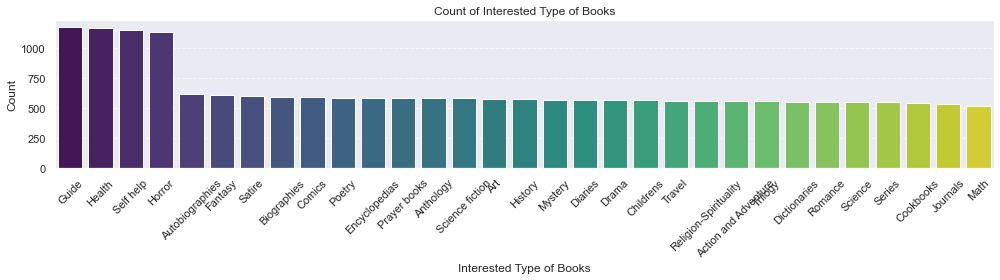

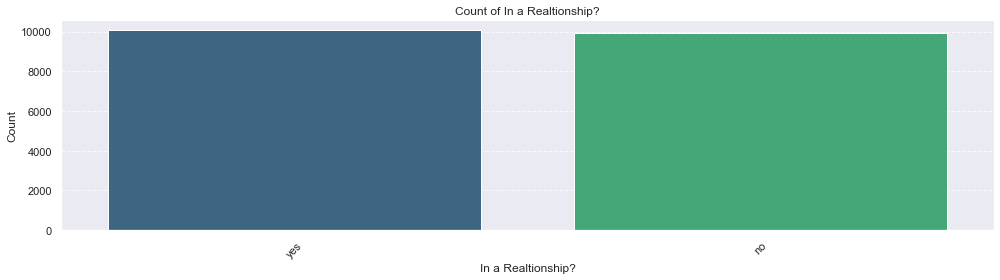

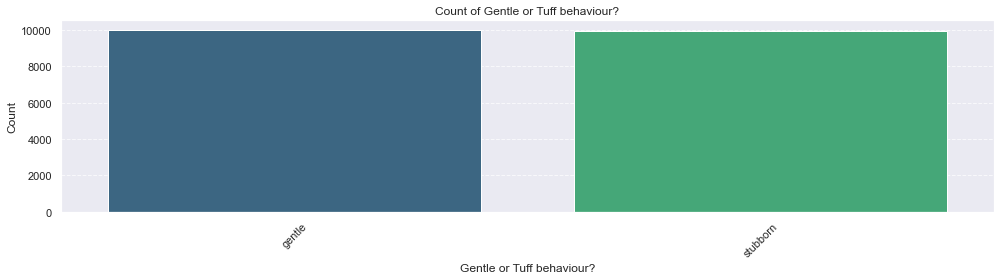

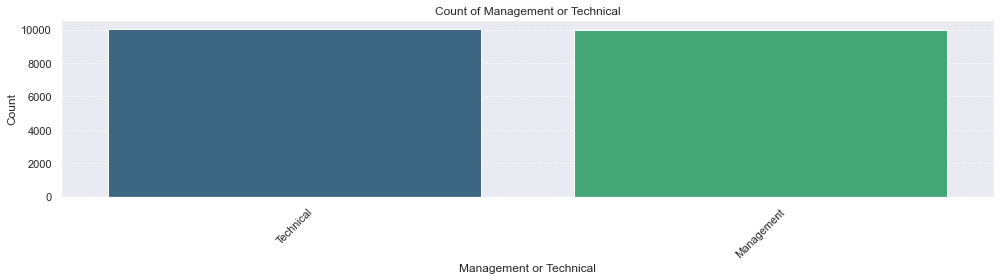

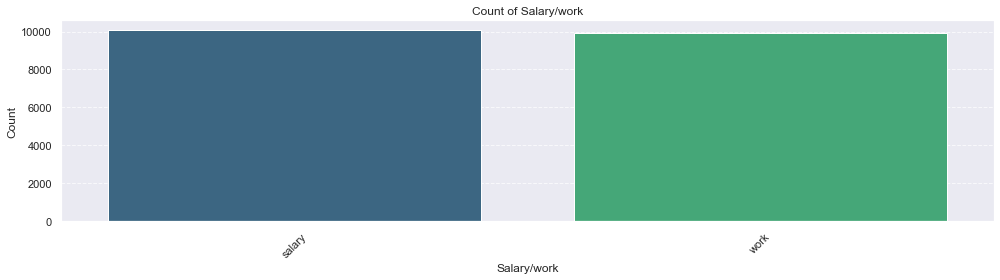

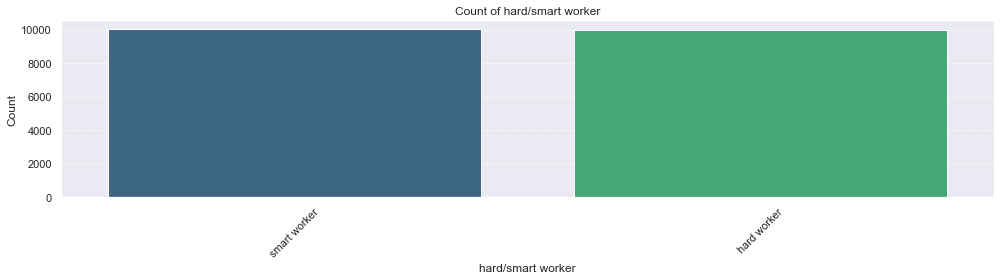

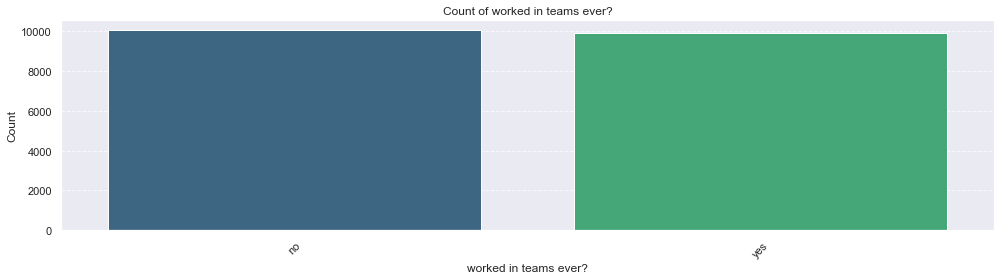

In [92]:
# Summary of categorical variables
categorical_columns = [
    "Interested Type of Books",
    "In a Realtionship?",
    "Gentle or Tuff behaviour?",
    "Management or Technical",
    "Salary/work",
    "hard/smart worker",
    "worked in teams ever?"
]

categorical_stats = {
    col: career_data[col].value_counts() for col in categorical_columns
}

# Plot bar charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(14, 4))
    sns.countplot(x=career_data[col], palette="viridis", order=career_data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

2. Data Preprocessing (cleaning, transformation)

In [13]:
df.dtypes

Unnamed: 0                                   int64
Acedamic percentage in Operating Systems     int64
percentage in Algorithms                     int64
Percentage in Programming Concepts           int64
Percentage in Software Engineering           int64
Percentage in Computer Networks              int64
Percentage in Electronics Subjects           int64
Percentage in Computer Architecture          int64
Percentage in Mathematics                    int64
Percentage in Communication skills           int64
Hours working per day                        int64
Logical quotient rating                      int64
hackathons                                   int64
coding skills rating                         int64
public speaking points                       int64
can work long time before system?           object
self-learning capability?                   object
Extra-courses did                           object
certifications                              object
workshops                      

* From Here we can see 15 features from 0-14 are numerical while the other 24 are categorical (from 15-38)

In [14]:
df.isna().sum()

Unnamed: 0                                  0
Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                         

<AxesSubplot:>

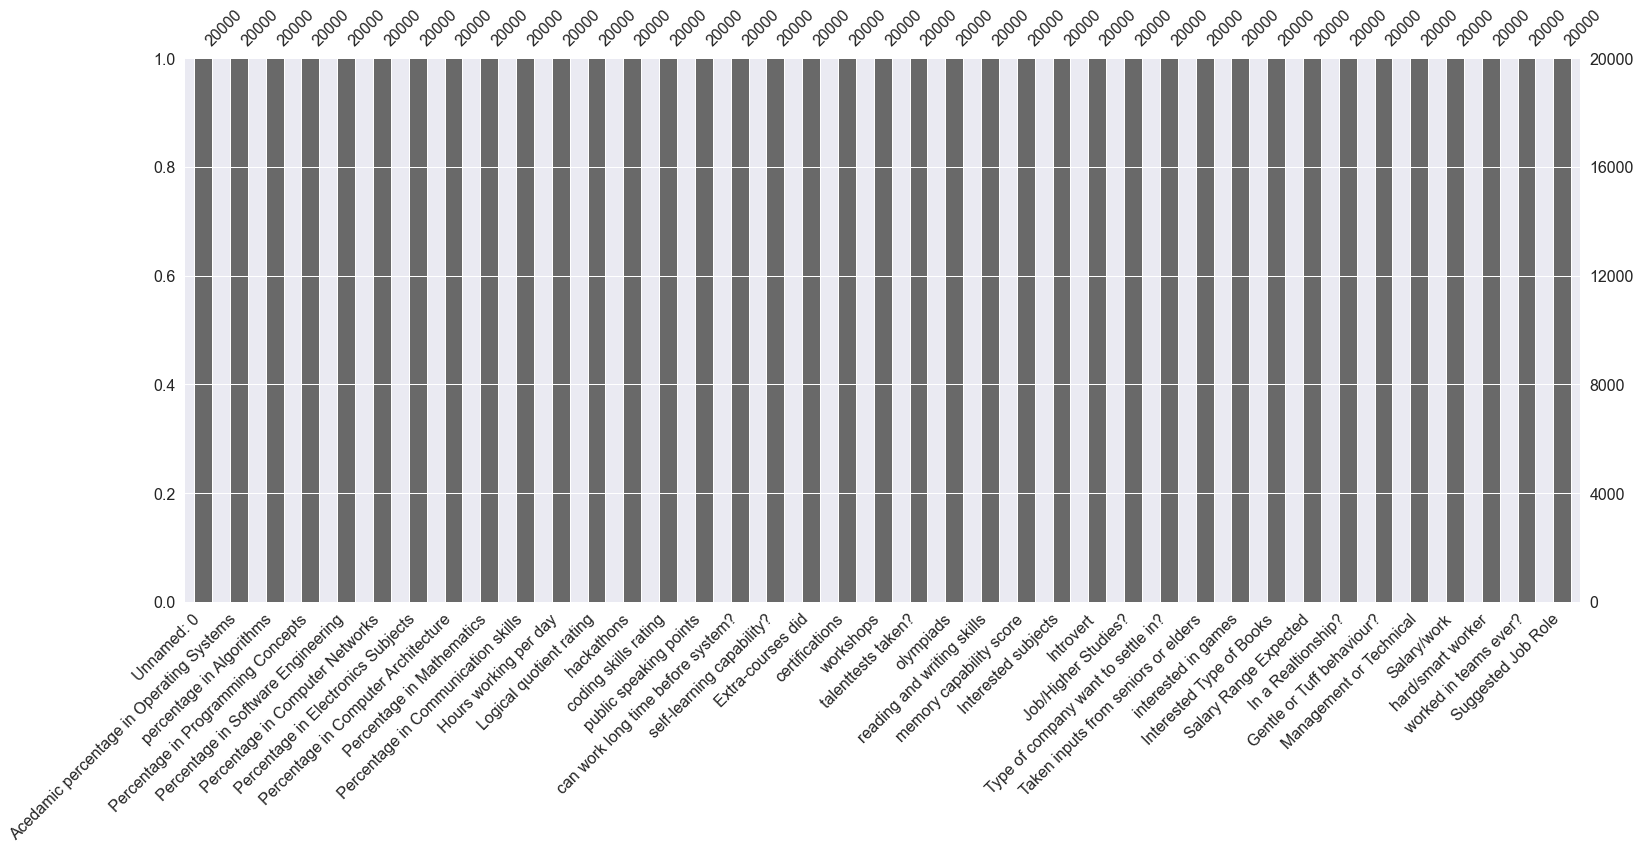

In [45]:
import missingno as msno
msno.bar(df)

* From what we observe, here there is no null value in each features according to the datasets. 
* Therefore no need for fill in missing data with mean for numerical and categorical

---

In [48]:
#preprocessing numerical data summary
df.select_dtypes(['int64']).describe()

,Unnamed: 0,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,5773.647028,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,4999.750000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,9999.500000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,14999.250000,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,19999.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


---

3. Data Mining (association rule mining) (e.g., Reading/Writing Skills, Memory Capability, Hard/Smart Worker, Worked in Teams Ever, Leadership Experience, etc.)
* Based on below code we chose to use mlxtend Transactionencoder which is one of the method we learn other than convert the datasets into list to list. The reason behind it is to directly work with many and complex data. 

Most Common Items:
   support      itemsets
0  0.49765  (Management)
1  0.50235   (Technical)
2  0.50155      (gentle)
Association rules saved to 'association_rules.csv'


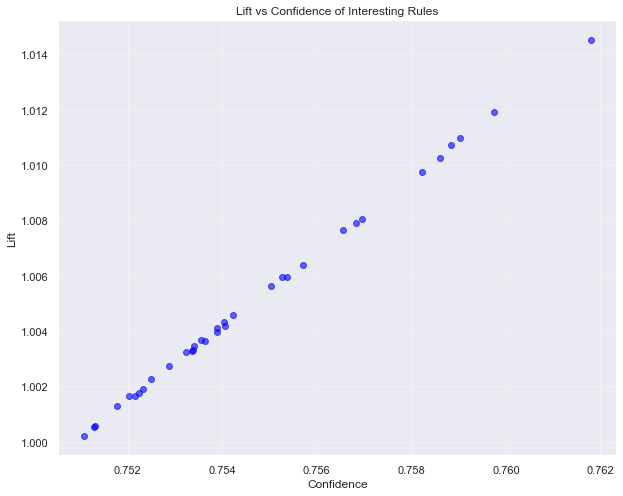

NameError: name 'x' is not defined

In [94]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "career_dataset.csv"  # Update with the correct path to your dataset
career_data = pd.read_csv(file_path)

# Selected relevant columns for association rule mining
columns_for_association = [
    "Interested Type of Books",
    "In a Realtionship?",
    "Gentle or Tuff behaviour?",
    "Management or Technical",
    "Salary/work",
    "hard/smart worker",
    "worked in teams ever?"
]

# Prepare data for transaction encoding
transaction_data = career_data[columns_for_association].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_data).transform(transaction_data)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)
print("Most Common Items:")
print(frequent_itemsets.head(3))
num_itemsets = len(frequent_itemsets)
# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)
rules_sorted = rules.sort_values(by="lift", ascending=False)

# Save the results to a file to make it easier to visualize
rules_sorted.to_csv("association_rules.csv", index=False)
print("Association rules saved to 'association_rules.csv'")

#storing sorted rules generated with below condition
interesting_rules = rules_sorted[
    (rules_sorted['lift'] > 1.0) & 
    (rules_sorted['confidence'] > 0.6) & 
    (rules_sorted['support'] > 0.01)
]

# Visualize lift vs confidence
plt.figure(figsize=(10, 8))
plt.scatter(interesting_rules['confidence'], interesting_rules['lift'], alpha=0.6, c='blue')
plt.title("Lift vs Confidence of Interesting Rules")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.grid(alpha=0.3)
plt.show()
print(len(x))

In [79]:
#get total number of rules generate using set parameters
len(rules_sorted)

364

In [80]:
#shows the top 5 sorted rules 
rules_sorted.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
140,"(salary, hard worker)",(Technical),0.25220,0.50235,0.13025,0.516455,1.028078,1.0,0.003557,1.029170,0.036523,0.208634,0.028344,0.387868
145,(Technical),"(salary, hard worker)",0.50235,0.25220,0.13025,0.259281,1.028078,1.0,0.003557,1.009560,0.054881,0.208634,0.009470,0.387868
192,"(hard worker, gentle)",(salary),0.25005,0.50390,0.12945,0.517696,1.027379,1.0,0.003450,1.028605,0.035535,0.207286,0.027810,0.387296
193,(salary),"(hard worker, gentle)",0.50390,0.25005,0.12945,0.256896,1.027379,1.0,0.003450,1.009213,0.053718,0.207286,0.009129,0.387296
132,"(gentle, Technical)",(salary),0.25185,0.50390,0.13030,0.517371,1.026734,1.0,0.003393,1.027913,0.034804,0.208330,0.027155,0.387977


As we can see here the strongest association rule is (salary, hardworker) with the highest lift of 1.028078

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define target variable and features for classification
target_column = "Job/Higher Studies?"
features = [
    "Acedamic percentage in Operating Systems",
    "percentage in Algorithms",
    "Percentage in Programming Concepts",
    "Percentage in Software Engineering",
    "Percentage in Computer Networks",
    "Percentage in Electronics Subjects",
    "Percentage in Computer Architecture",
    "Percentage in Mathematics",
    "Percentage in Communication skills",
    "coding skills rating",
    "public speaking points",
    "can work long time before system?",
    "self-learning capability?",
    "worked in teams ever?",
]

# Encode categorical columns in features and target
encoder = LabelEncoder()
for col in ["can work long time before system?", "self-learning capability?", "worked in teams ever?"]:
    career_data[col] = encoder.fit_transform(career_data[col])

career_data[target_column] = encoder.fit_transform(career_data[target_column])

# Split dataset into features (X) and target (y)
X = career_data[features]
y = career_data[target_column]

# Normalize numerical features for classification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16000, 14), (4000, 14), (16000,), (4000,))